In this file Kochi-shi data is taken from Pegasus32 and the `aos` area is clipped to save all files for the simulation case

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('default')

In [2]:
# case = 'kochi'
case = 'arahama'

if case == 'kochi':
    census = gpd.read_file('/Volumes/Pegasus32/kochi/census/kochi-shi-census.shp').to_crs(4326)
    shelters = gpd.read_file('/Volumes/Pegasus32/kochi/evacuation/Kochi_EvacBldg_CRS4326.geojson',driver='GeoJSON')
    mesh = gpd.read_file('/Volumes/Pegasus32/kochi/mesh/GEOJSON/kochi-shi-mesh.geojson',driver='GeoJSON')
    shi_pol = gpd.read_file('/Volumes/Pegasus32/kochi/polygon/WGS84/GEOJSON/kochi-shi-wgs84.geojson',driver='GeoJSON')
    shi_town = gpd.read_file('/Volumes/Pegasus32/kochi/town/shi/kochi-shi_town.shp')
    edges = gpd.read_file('/Volumes/Pegasus32/kochi/road/pref/kochi_edges_crs6690.geojson',driver='GeoJSON').to_crs(4326)
    nodes = gpd.read_file('/Volumes/Pegasus32/kochi/road/pref/kochi_nodes_crs6690.geojson',driver='GeoJSON').to_crs(4326)
    
if case == 'arahama':
    census = gpd.read_file('/Volumes/Pegasus32/arahama/census/arahama_census.geojson',driver='GeoJSON').to_crs(4326)
    census.rename(columns={'8':'M_TOTPOP_H'},inplace=True)
    # shelters = gpd.read_file('/Volumes/Pegasus32/arahama/evacuation/????',driver='GeoJSON')
    mesh = gpd.read_file('/Volumes/Pegasus32/arahama/mesh/arahama_mesh4.geojson',driver='GeoJSON')
    # shi_pol = gpd.read_file('/Volumes/Pegasus32/kochi/polygon/WGS84/GEOJSON/kochi-shi-wgs84.geojson',driver='GeoJSON')
    # shi_town = gpd.read_file('/Volumes/Pegasus32/arahama/town/????')
    edges = gpd.read_file('/Volumes/Pegasus32/arahama/road/arahama_network.gpkg',driver='GPKG',layer=0).to_crs(4326)
    nodes = gpd.read_file('/Volumes/Pegasus32/arahama/road/arahama_network.gpkg',driver='GPKG',layer=1).to_crs(4326)    

<AxesSubplot:>

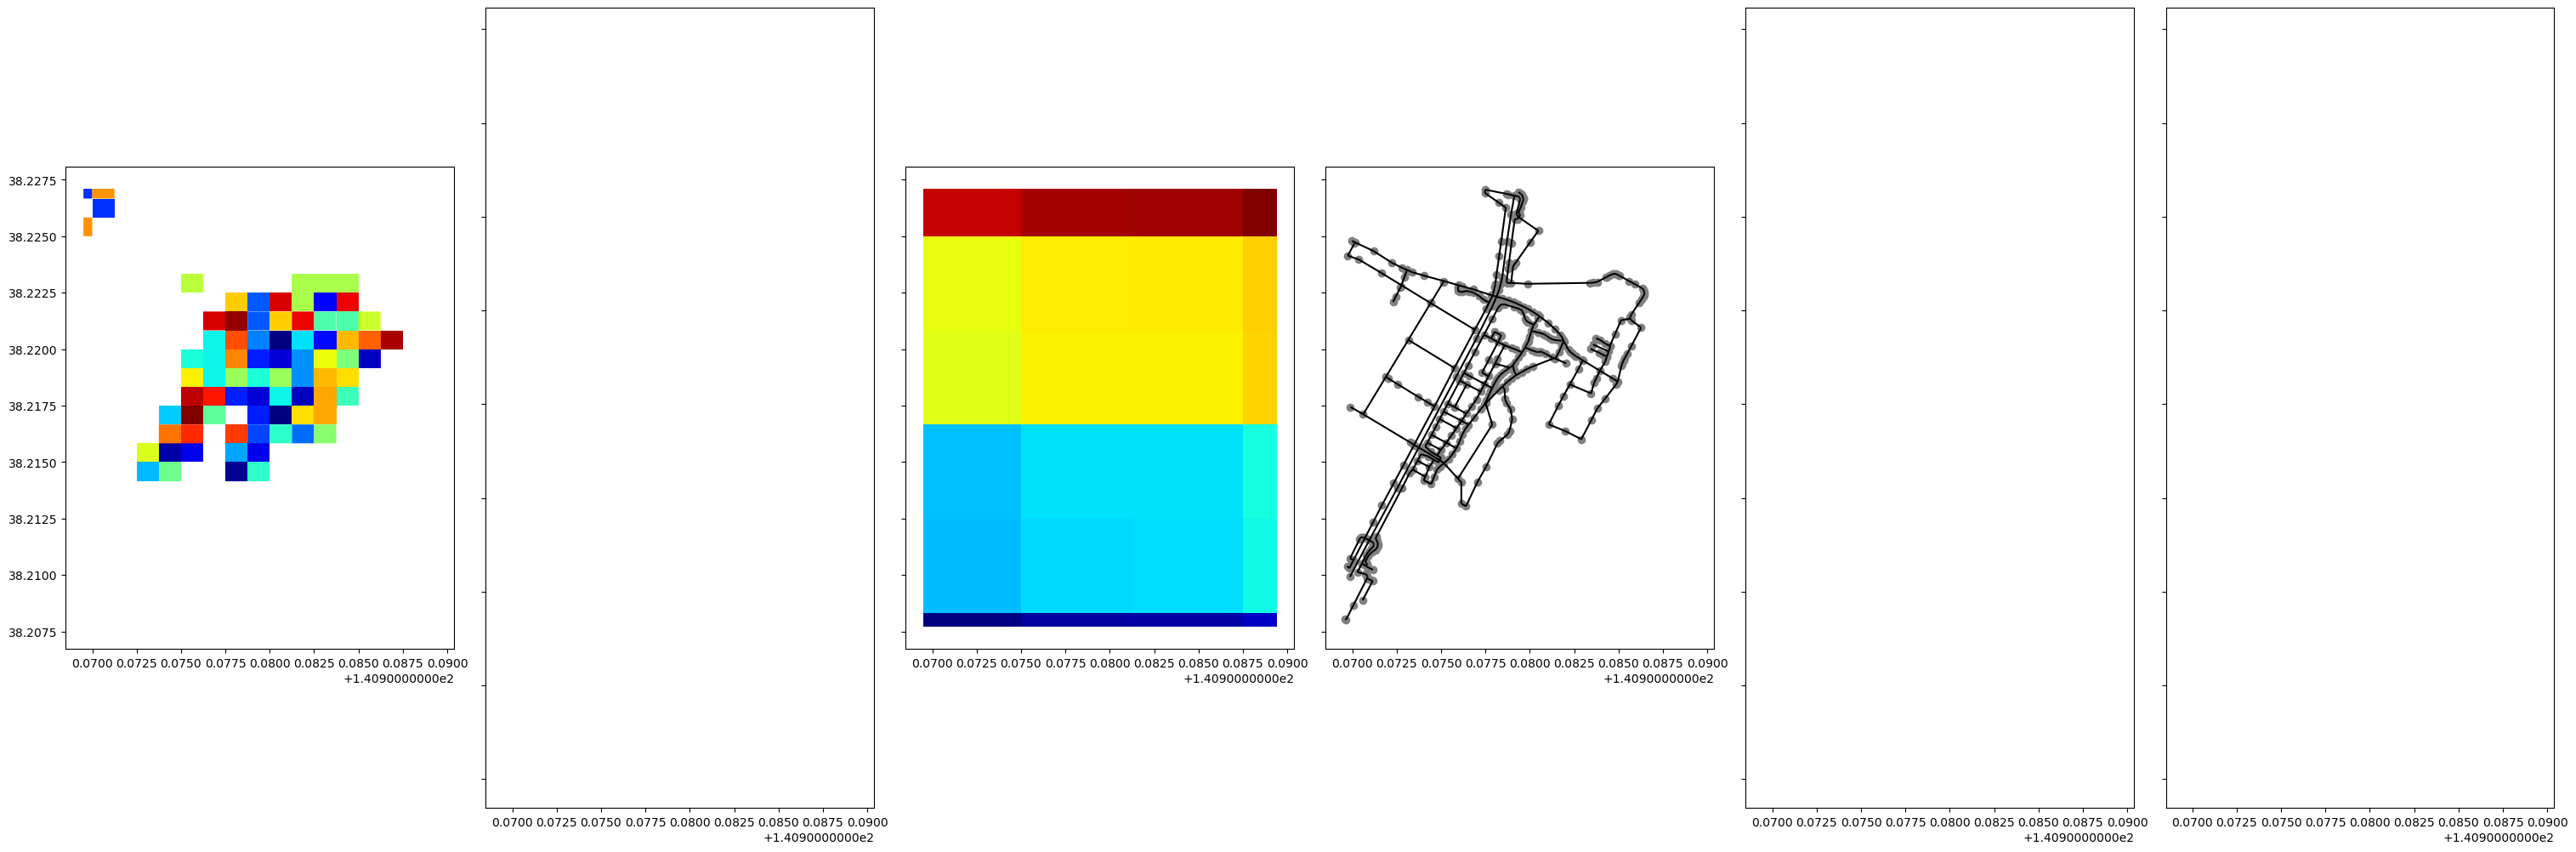

In [3]:
fig,axs = plt.subplots(1,6,sharex=True,sharey=True,figsize=(30,10))
plt.tight_layout()
census.plot(ax=axs[0],column='M_TOTPOP_H',cmap='jet')
# shelters.plot(ax=axs[1],column='capacity_per',cmap='jet')
mesh.plot(ax=axs[2],column='MESH4_ID',cmap='jet')
edges.plot(ax=axs[3],color='grey',lw=1)
nodes.plot(ax=axs[3],markersize=3,color='k')
# shi_town.plot(ax=axs[4],column='Val_GovCod')
# shi_pol.plot(ax=axs[5])


In [4]:
aos = gpd.read_file(f'./case/{case}/aos.geojson',driver='GeoJSON')

In [5]:
c = census.clip(aos)
# sh = shelters.clip(aos)
m = mesh.clip(aos)
e = edges.clip(aos)
n = nodes.clip(aos)
# t = shi_town.clip(aos)

<AxesSubplot:>

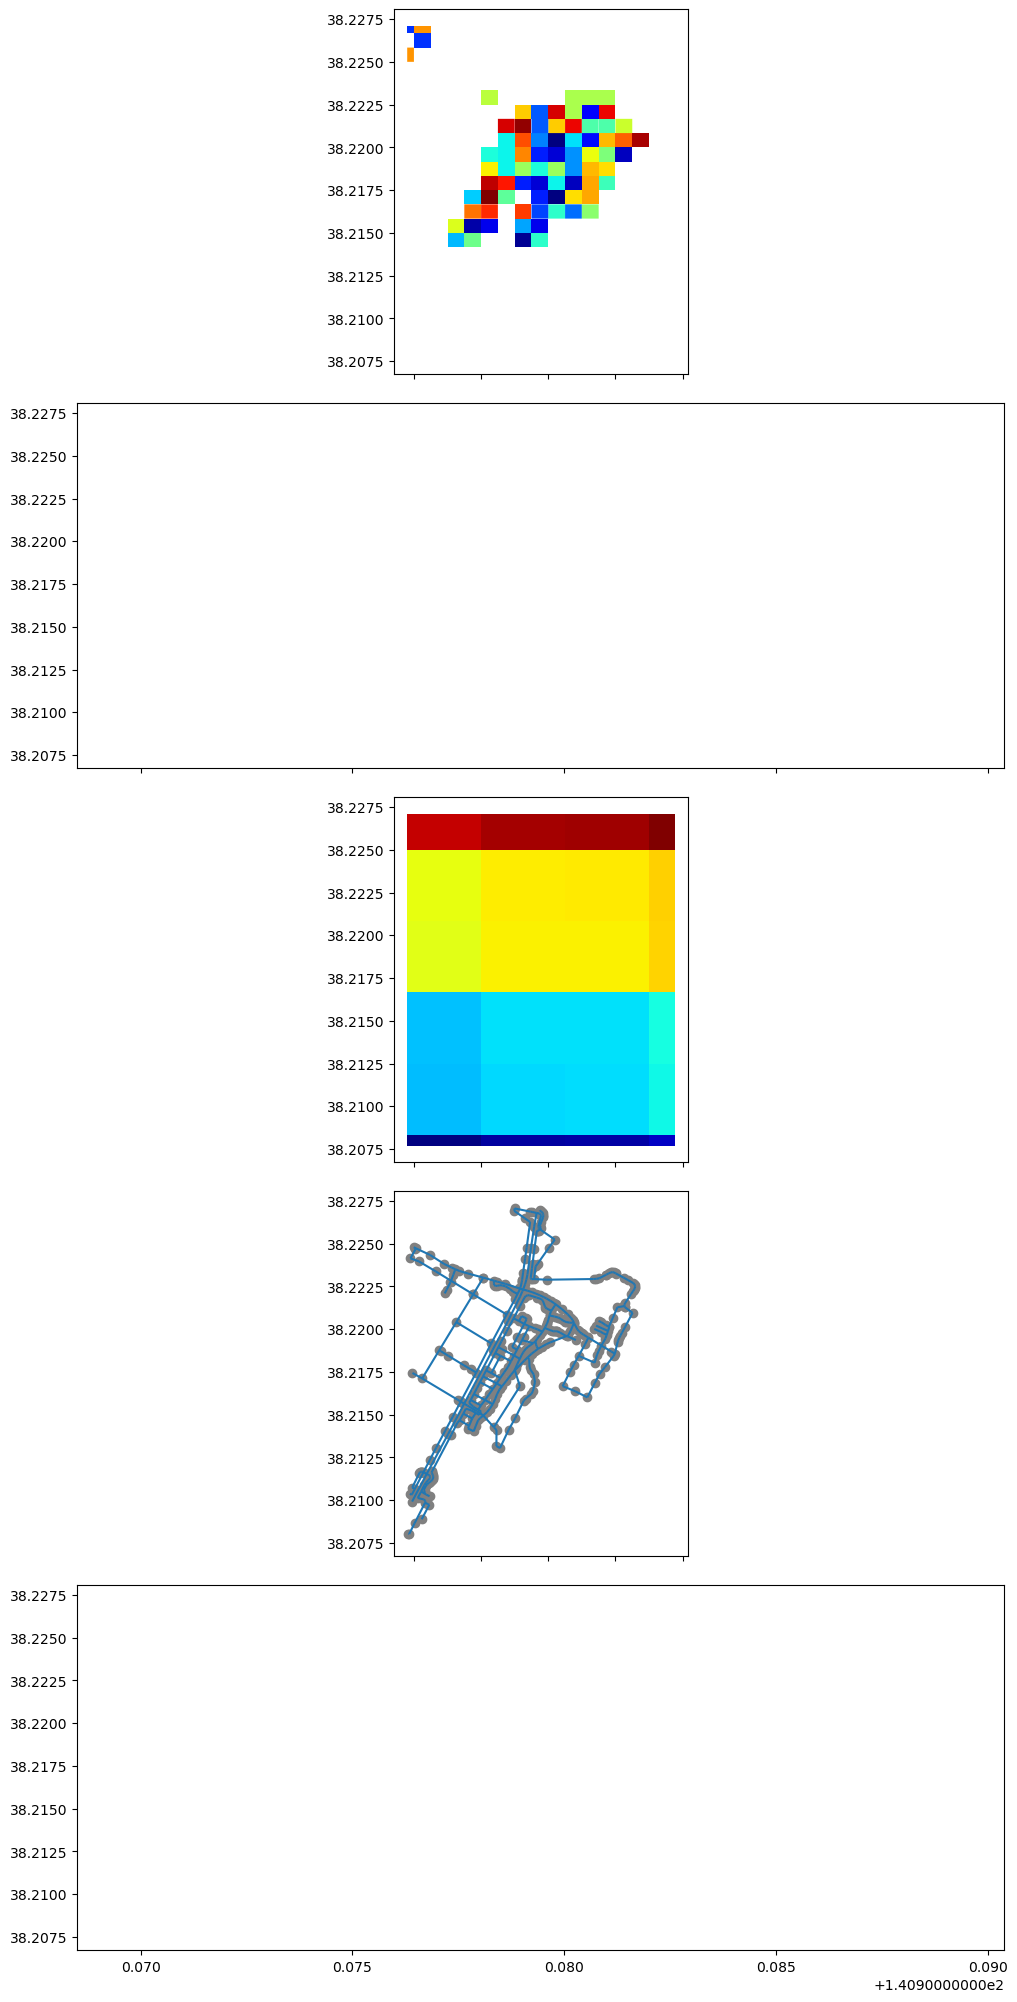

In [6]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(10,20))
plt.tight_layout()
c.plot(ax=axs[0], column='M_TOTPOP_H',cmap='jet')
# sh.plot(ax=axs[1], column='capacity_per',cmap='jet')
m.plot(ax=axs[2], column='MESH4_ID',cmap='jet')
e.plot(ax=axs[3], color='grey',lw=1)
n.plot(ax=axs[3], markersize=3)
# t.plot(ax=axs[4], column='Val_GovCod')

In [21]:
c.to_file(f'./case/{case}/aos_census.geojson',driver='GeoJSON')
# sh.to_file(f'./case/{case}/aos_shelters.geojson',driver='GeoJSON')
m.to_file(f'./case/{case}/aos_mesh.geojson',driver='GeoJSON')
e.to_file(f'./case/{case}/aos_edges_esri.geojson',driver='GeoJSON')
n.to_file(f'./case/{case}/aos_nodes_esri.geojson',driver='GeoJSON')
# t.to_file(f'./case/{case}/aos_town.geojson',driver='GeoJSON')

In [7]:
import geopandas as gpd
gdf = gpd.read_file('./case/kochi/aos_census.geojson', driver="GeoJSON")
gdf.iloc[:,:-1]

,MESH1_ID,MESH2_ID,MESH3_ID,MESH4_ID,CHIKEIZU,HTKSYU,CITY_NUM,CITY1,CITY2,CITY3,...,M_ALLIND_4,M_RETL_N_2,M_FAB_NUM1,M_REST_N_2,M_HOSP_N_2,M_CLIN_N_1,M_DENT_N_2,M_STNUM_D1,Shape_Leng,Shape_Area
0,5033,503323,50332379,503323792,いの,None,1,39201,None,None,...,46,6,3,4,2,0,0,826,0.020833,0.000026
1,5033,503324,50332460,503324601,高知,None,1,39201,None,None,...,80,17,10,12,0,0,2,873,0.020833,0.000026
2,5033,503324,50332460,503324602,高知,None,1,39201,None,None,...,53,16,5,6,1,1,0,614,0.020833,0.000026
3,5033,503323,50332369,503323692,いの,None,1,39201,None,None,...,76,21,5,2,1,1,1,0,0.020833,0.000026
4,5033,503323,50332369,503323694,いの,None,1,39201,None,None,...,48,6,2,4,0,0,0,211,0.020833,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,5033,503324,50332486,503324863,高知,None,1,39201,None,None,...,34,1,0,1,0,0,0,0,0.020833,0.000026
80,5033,503324,50332485,503324851,高知,None,1,39201,None,None,...,74,13,2,6,0,1,1,0,0.020833,0.000026
81,5033,503324,50332485,503324853,高知,@,1,39201,None,None,...,23,3,2,2,0,0,0,0,0.020833,0.000026
82,5033,503324,50332484,503324843,高知,None,1,39201,None,None,...,80,22,7,10,1,1,0,0,0.020833,0.000026
